In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import elra

In [2]:
glac1d_22_ice_da = xr.open_dataset("../../../data/reconstructions/glac1d_laea_5km_eurasia.nc").sel(time=-22000).ice_thickness
glac1d_22_topo_da = xr.open_dataset("../../../data/reconstructions/glac1d_laea_5km_eurasia.nc").sel(time=-22000).bedrock_topography
modern_topo_da = xr.open_dataset("../../../data/simulations/pgm_batchelor_topo0.nc").bedrock_topography.sel(time=-140000)
glac1d_22_mask_da = (xr.open_dataset("../../../data/simulations/ld_glac1d.nc").sel(time=-22000, ensemble_index=0).ice_thickness > 0).astype(int)

In [4]:
# deform the modern topography with glac1d at 22ka
deformer = elra.Deformer(topography_da=modern_topo_da, coarsen_window=10)
deformed_topography = deformer.deform(ice_da=glac1d_22_ice_da)

  0%|          | 0/122 [00:00<?, ?it/s]

In [8]:
# work out the deform field for glac1d topo and equilibirum topo
glac1d_22_topo_deformfield_da = glac1d_22_mask_da*(glac1d_22_topo_da - modern_topo_da)
equib_deformfield_da = glac1d_22_mask_da*(deformed_topography.z - modern_topo_da)

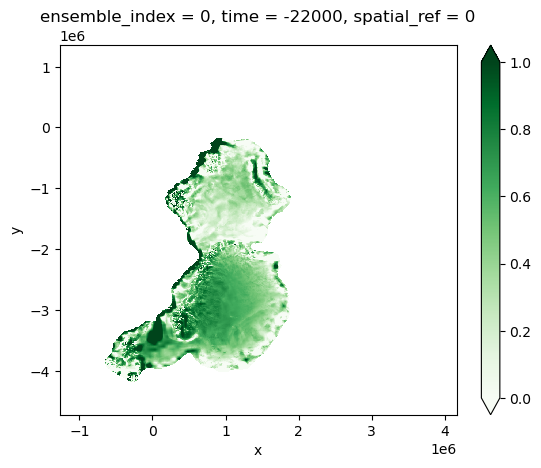

In [9]:
# look at the percentage of the glac1d deform field vs equilibrium
(glac1d_22_topo_deformfield_da/equib_deformfield_da).plot(vmax=1,vmin=0,cmap="Greens")

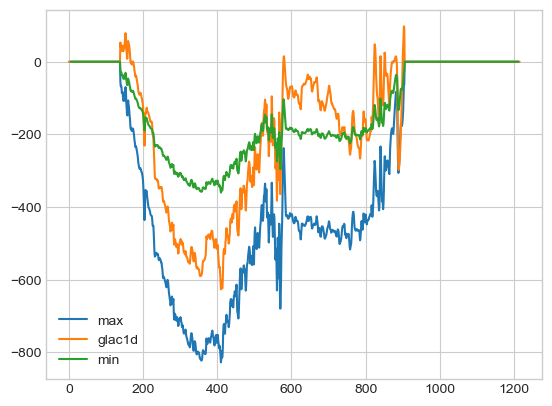

In [41]:
plt.plot(equib_deformfield_da.sel(x=1e6, method="nearest"), label="max")
plt.plot(glac1d_22_topo_deformfield_da.sel(x=1e6, method="nearest"), label="glac1d")
plt.plot(av_perc*equib_deformfield_da.sel(x=1e6, method="nearest"), label="min")
plt.legend()

In [11]:
# the average deformation percentage
av_perc = np.nanmean(glac1d_22_topo_deformfield_da/equib_deformfield_da)
print(av_perc)

0.4351318053417295


In [13]:
from visplot.maps import plot_map

In [19]:
np.nanmax(equib_deformfield_da.values)

585.5260121927341

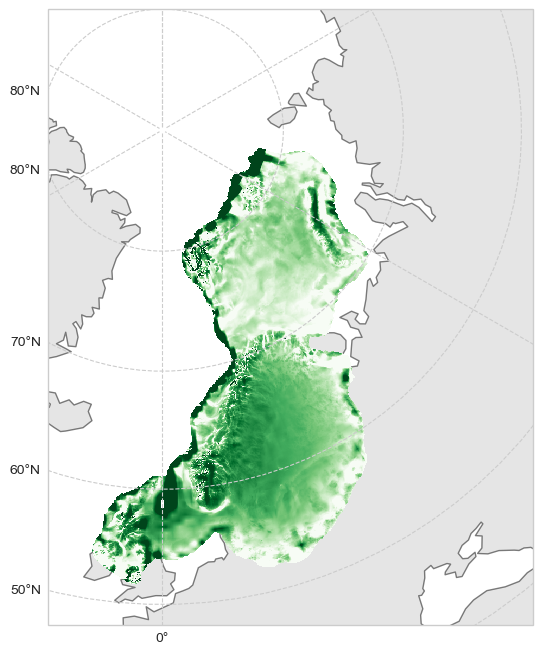

In [32]:
fig, ax = plot_map()
plot_data = (glac1d_22_topo_deformfield_da/equib_deformfield_da).values
ax.pcolormesh(
    equib_deformfield_da.x,
    equib_deformfield_da.y,
    np.ma.masked_where(glac1d_22_ice_da==0, plot_data),
    vmin=0,
    vmax=1,
    cmap="Greens"
)

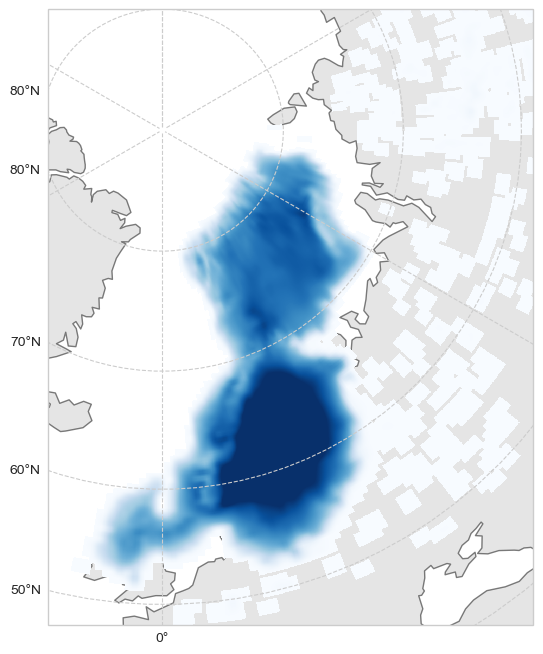

In [29]:
fig, ax = plot_map()
plot_data = glac1d_22_ice_da.values
ax.pcolormesh(
    equib_deformfield_da.x,
    equib_deformfield_da.y,
    np.ma.masked_where(glac1d_22_ice_da==0, plot_data),
    vmin=0,
    vmax=2000,
    cmap="Blues"
)

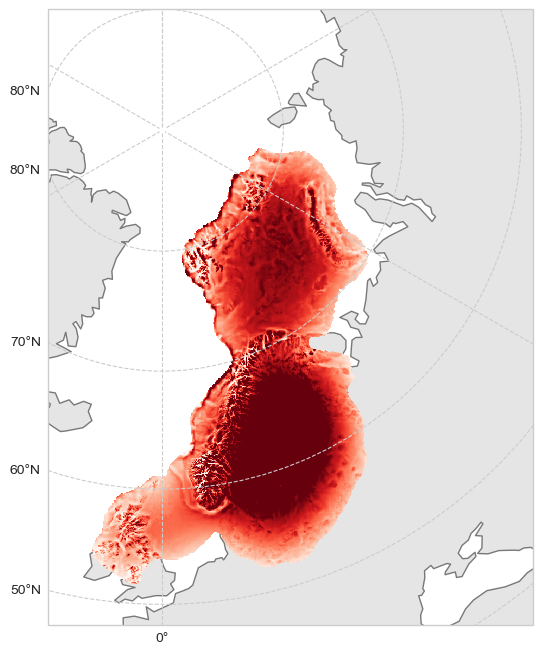

In [31]:
fig, ax = plot_map()
plot_data = equib_deformfield_da.values
ax.pcolormesh(
    equib_deformfield_da.x,
    equib_deformfield_da.y,
    np.ma.masked_where(plot_data==0, plot_data),
    vmax=0,
    vmin=-500,
    cmap="Reds_r"
)

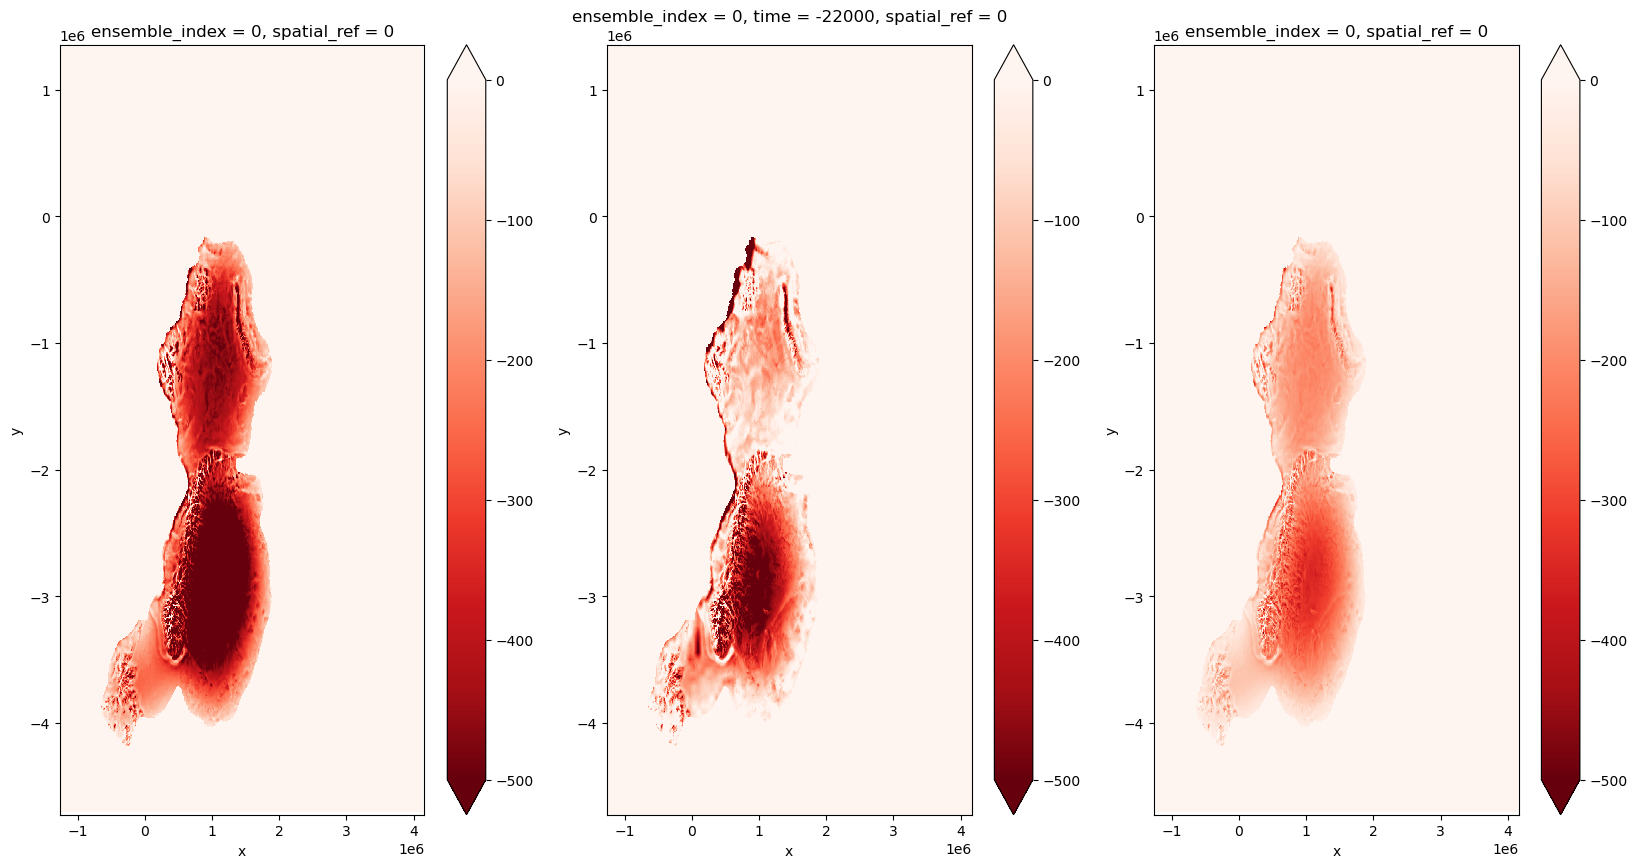

In [12]:
# deformation can therefore vary between 100% and 47.8% of the equilibrium topography
fig, ax = plt.subplots(1,3, figsize=[20,10])

(equib_deformfield_da).plot(ax=ax[0],vmin=-500,vmax=0, cmap="Reds_r")
(glac1d_22_topo_deformfield_da).plot(ax=ax[1],vmin=-500,vmax=0, cmap="Reds_r")
(equib_deformfield_da*av_perc).plot(ax=ax[2],vmin=-500,vmax=0, cmap="Reds_r")

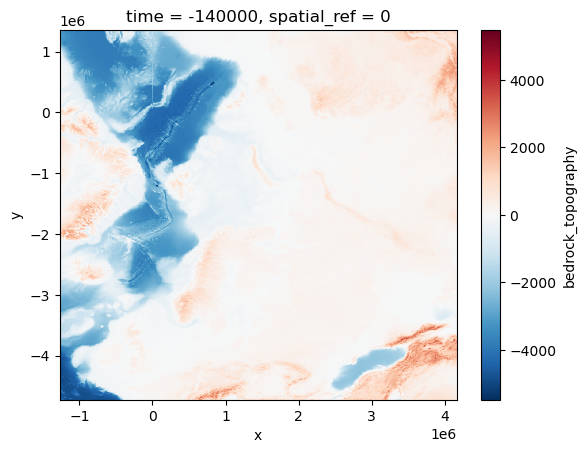

In [97]:
modern_topo_da.plot()